# Введение в машинное обучение для Java-разработчиков
### Практическое задание 1. Линейная регрессия
### Дата выдачи: 18.10.2023

### Дедлайн: 23:59MSK 01.11.2022

## О задании
В этом задании мы попытаемся разобраться в механизме линейной регрессии. 

## Оценивание и штрафы
Каждая из задач (помечены тегом [task]) имеет определенное количество баллов (указана в скобках около задачи). Максимально допустимая оценка за работу — 16 баллов. 

- от 4 до 9 баллов - оценка "3"
- от 10 до 16 баллов - оценка "4"
- 17 баллов - оценка "5"

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов, что автоматически ведет к несдаче курса. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в комментариях. 
В данном задании есть необязательные бонусные задания, выполнение которых добавляет баллы в карму :)

## Формат сдачи
Задания сдаются путем форка основного репозитория, коммита решения в мастер-ветку вашего форка и оповещении преподавателя о выполнении ДЗ. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

[[Укажите количество набранных баллов]]

## Часть 1. Одномерная линейная регрессия

Замечание: мы будем реализовывать линейную регрессию, при условии, что свободный коэффициент равен нулю

In [111]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')
sns.set('notebook', font_scale=1.25, style='whitegrid')

C:\Users\dimit\AppData\Local\Temp\ipykernel_8\3370634116.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### [task] Прокомментируйте каждую строчку кода в функции create_dataset (1 балл)

In [112]:
# параметры: n - количество точек, slope - угол наклона функции, noise_stddev - среднекв отклонение шума random state - начальное значение рандома
def create_dataset(n, slope, noise_stddev, random_state=0):
    # инициализация генератора случайных чисел
    random_state = np.random.RandomState(int(random_state))
    # массив равномерно распределенных значений [-2, 2] размера n
    x_n = np.linspace(-2, 2, n)
    # значения функции k*x + случайное число * шум
    y_n = slope * x_n + random_state.randn(n) * noise_stddev
    return x_n, y_n

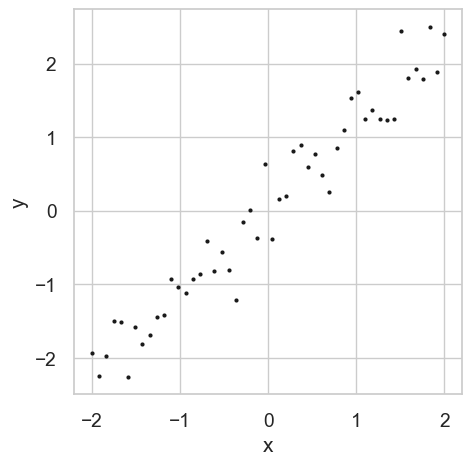

In [113]:
x, y = create_dataset(n=50, slope=1.234, noise_stddev=0.3)
# создаем один график размера 5*5
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
# отображаем на графике полученные ранее x, y в виде точек (параметр k.)
plt.plot(x, y, 'k.');
# подписываем ось абсцисс
plt.xlabel('x');
# подписываем ось ординат
plt.ylabel('y');

### [task] Реализуйте функции расчета результата 1-мерной линейной модели и MSE (1 балл за каждую фунцкию)

In [114]:
def predict_1d(x, w):
    return x*w

def calc_mean_squared_error(yhat_N, y_N):
    return np.mean(np.square(yhat_N - y_N))

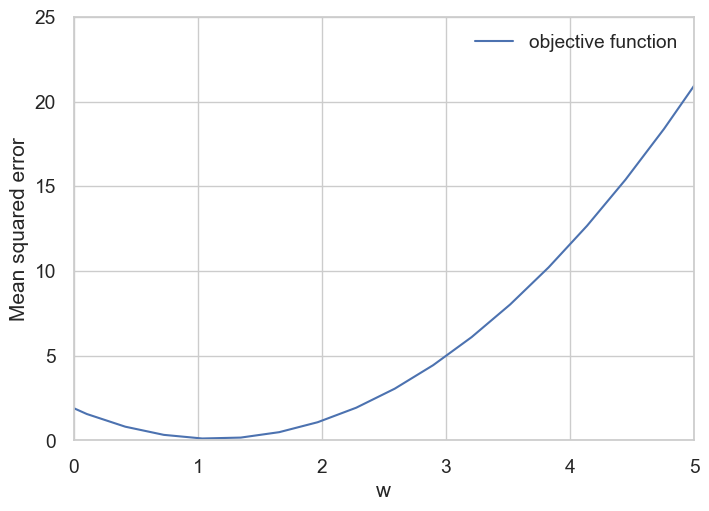

In [115]:
G = 30
w_candidates_G = np.linspace(-3, 6, G)
error_G = np.zeros(G)
for i, w in enumerate(w_candidates_G):
    yhat_N = predict_1d(x, w)
    error_G[i] = calc_mean_squared_error(yhat_N, y)
plt.axis([0, 5, 0, 25])
plt.plot(w_candidates_G, error_G, label='objective function');
plt.xlabel('w');
plt.ylabel('Mean squared error');
plt.legend()

### [task] Найдите методом пристального взгляда по графику из прошлого пункта оптимальное значение параметра w и подставьте найденное значение в переменную w (1 балл)

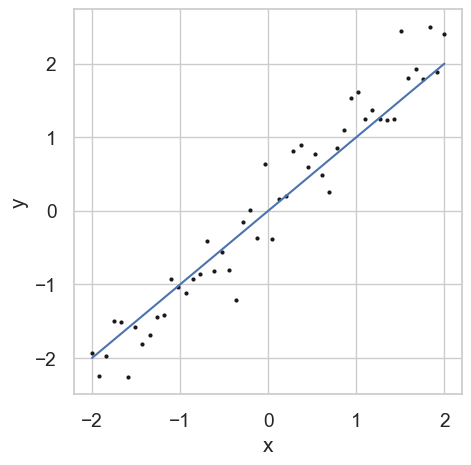

In [116]:
w = 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
plt.plot(x, y, 'k.');
plt.plot([predict_1d(-2, w), predict_1d(2, w)], [-2, 2])
plt.xlabel('x');
plt.ylabel('y');

### [task] Что происходит с линейной моделью, когда меняется параметр w (1 балл)?
С изменением веса меняется угол наклона прямой линейной модели. Чем больше w, тем больше наклон.

## Часть 2. Градиентный спуск

### [task] Реализуйте функцию потерь RSS (1 балл)

In [117]:
def calc_loss(x, y, w):
    return np.sum((x*w - y) ** 2)

### [task] Реализуйте функцию расчета градиента (2 балл)

hint: Продифференцируйте функцию потерь RSS

In [118]:
def calc_grad(x, y, w):
    grad = 0
    for i in range(len(x)):
        grad += 2 * x[i] * (x[i] * w - y[i])
    return grad

### [task] Допишите код для обновления весов (2 балла)

In [119]:
def minimize_via_grad_descent(calc_loss, calc_grad, init_w=0.0, step_size=0.001, max_iters=20):
    w = init_w
    print(w)
    for iter_id in range(max_iters):
        grad = calc_grad(x, y, w)
        w = w - step_size * grad
        loss = calc_loss(x, y, w)
        print(f"Loss = {loss}, grad = {grad}, w = {w}")
    wopt = w
    return wopt

In [120]:
wopt = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.001, max_iters=50);

0.0
Loss = 70.51044434322476, grad = -156.55658221581643, w = 0.15655658221581645
Loss = 53.5926333823205, grad = -134.83036264300918, w = 0.29138694485882566
Loss = 41.044564048036136, grad = -116.11921027622425, w = 0.4075061551350499
Loss = 31.737565383618403, grad = -100.00470762564619, w = 0.5075108627606961
Loss = 24.83449353791175, grad = -86.12650330208713, w = 0.5936373660627833
Loss = 19.714432535950806, grad = -74.17425386424647, w = 0.6678116199270298
Loss = 15.916844266591319, grad = -63.88068394022858, w = 0.7316923038672584
Loss = 13.10014410265706, grad = -55.01560943423769, w = 0.786707913301496
Loss = 11.010976122673437, grad = -47.38079016581286, w = 0.8340887034673089
Loss = 9.46142430864843, grad = -40.805496836679666, w = 0.8748942003039886
Loss = 8.312109917774507, grad = -35.1426931940384, w = 0.910036893498027
Loss = 7.459654674191035, grad = -30.265748016090207, w = 0.9403026415141171
Loss = 6.827382122761135, grad = -26.065603393449127, w = 0.9663682449075662

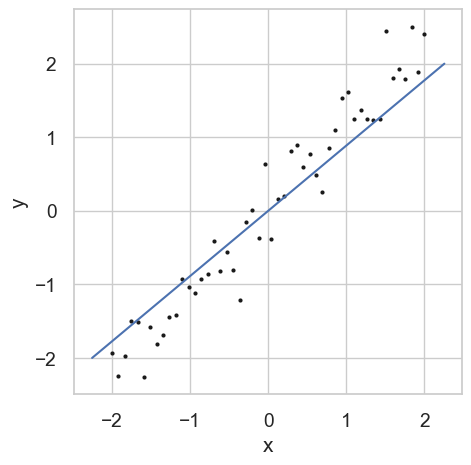

In [121]:
w = wopt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
plt.plot(x, y, 'k.');
plt.plot([predict_1d(-2, w), predict_1d(2, w)], [-2, 2])
plt.xlabel('x');
plt.ylabel('y');

### [task] Что будет если сделать слишком маленький шаг или слишком большой (1 балл)
hint: Попробуйте увеличить число итераций
Слишком маленький шаг - можем не достигнуть оптимума функции
Сликом большой шаг - модель может "перепрыгнуть" через оптимум (расхождение)

## Часть 3. 

В данной части мы будем учиться использовать готовую реализацию линейной регрессии из библиотеки scikit-learn на небольшой, но реальной задаче из медицины. Обязательно изучите описание датасета (признаки и целевая переменная).

In [122]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes(as_frame=True)
data = diabetes["frame"]
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [123]:
X = data.drop(labels='target', axis=1)
y = data['target']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


### [task] Напишите код для обучения модели и предсказания модели на тестовой выборке (2 балла)
Чтобы выполнить задание, воспользуйтесь документацией для класса SGDRegressor

Mean Squared Error (MSE): 3143.318172037246


C:\Users\dimit\miniconda3\envs\dmit_env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


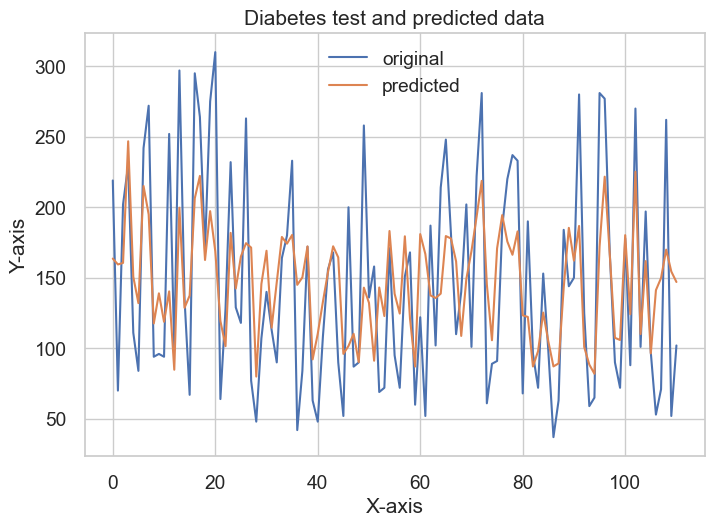

In [125]:
model = SGDRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# нашел на каком-то сайте
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Diabetes test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### [task] Попробуйте улучшить результат за счет изменения гиперпараметров линейной модели (2 балла)

In [126]:
model = SGDRegressor(loss='squared_error', alpha=0.11, max_iter=9500, penalty = "l1")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2755.368457970802


C:\Users\dimit\miniconda3\envs\dmit_env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Какие признаки больше всего влияют на целевую переменную? Выберите 3 признака. (2 балла)
hint: посмотрите на полученные веса модели

In [127]:
coef = model.coef_
coef_sorted = coef.argsort()[-3:][::-1]
top_feature_names = [model.feature_names_in_[i] for i in coef_sorted]
print("Все признаки:")
print(model.feature_names_in_)
print("Топ 3 влияющих признака:")
print(top_feature_names)

Все признаки:
['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']
Топ 3 влияющих признака:
['bmi', 's5', 'bp']


# Бонусные вопросы:
- Если вы нашли признаки, которые наибольшим образом влияют на модель, проверьте согласуется ли это с медициной в реальности ?
- Есть ли какие-то проблемы в текущей схеме обучения и валидации модели? 

Ответы пишите в ячейке ниже

In [128]:
#